# Mathematical Underpinnings - Lab 4

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import pandas as pd

In [ ]:
from scipy import stats
from sklearn.metrics import mutual_info_score

## Task 1

### a)

#### bp 1)

In [ ]:
# a heatmap
# you may use pcolormesh function and draw a heatmap for a sample
# or draw a heatmap for a teoretic density function

# I give you an answer to that task, because it may take too much time to do it during labs.

In [ ]:
def plot_xyz(data_2d, nbins=300):
    x = data_2d[:,0]
    y = data_2d[:,1]
    k = gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    return xi, yi, zi

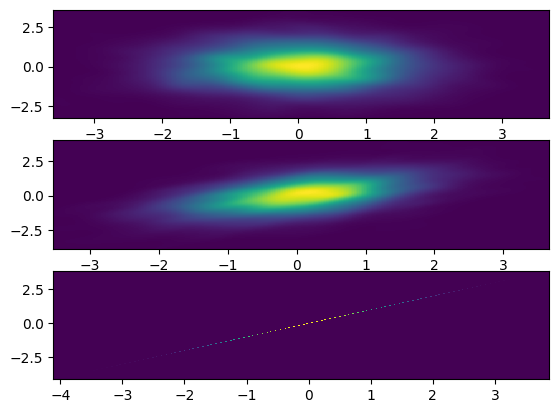

In [ ]:
fig, axs = plt.subplots(3)

n = 5000

data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0], [0, 1]]), n)
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 0.5], [0.5, 1]]), n)
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, 1], [1, 1]]), n)
xi_2, yi_2, zi_2 = plot_xyz(data_2d)

# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2)

In [ ]:
# pearsonr - Pearson correlation
# mutual_info_classif - MI (I haven't checked if it works correctly, but it seems to;
#                           for sure sklearn.metrics.mutual_info_score doesn't do what we want)

In [ ]:
data_2d
type(data_2d)

array([[-0.1125085 , -0.1125085 ],
       [ 0.48014091,  0.48014091],
       [-1.20500595, -1.20500595],
       ...,
       [ 0.42287017,  0.42287017],
       [ 0.2654877 ,  0.2654877 ],
       [ 1.66752   ,  1.66752   ]])

In [ ]:
sigmas = [0,0.5,1]
results_pearson = []
results_mutual = []
for i in range(3):
  data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, sigmas[i]], [sigmas[i], 1]]), n)
  X, Y = data_2d[:,0], data_2d[:,1]
  results_pearson.append(stats.pearsonr(X,Y)[0])
  num_bins = 10
  bin_X = np.linspace(X.min(), X.max(), num_bins + 1)
  bin_Y = np.linspace(Y.min(), Y.max(), num_bins + 1)
  discretized_X = np.digitize(X, bin_X)
  discretized_Y = np.digitize(Y, bin_Y)
  results_mutual.append(mutual_info_score(discretized_X, discretized_Y))
print(results_pearson)
print(results_mutual)

[0.007002029350483952, 0.5029365490869213, 1.0]
[0.007384455863817132, 0.14036388848978165, 1.7370042904129375]


<function matplotlib.pyplot.show(close=None, block=None)>

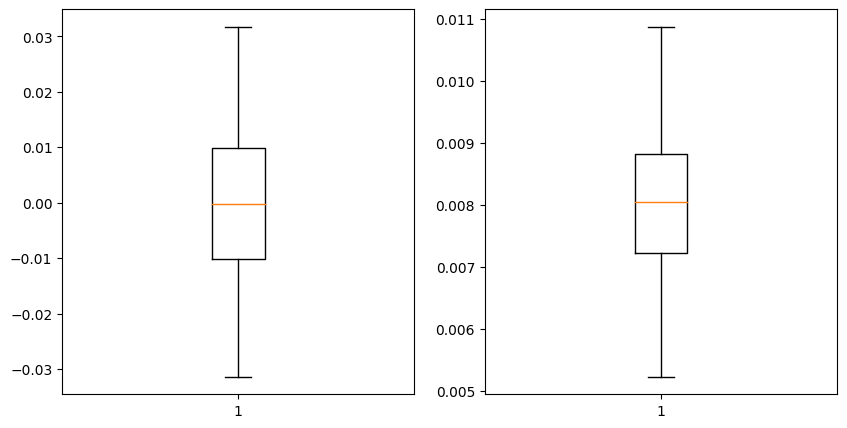

In [ ]:
# dla sigmy = 0
sigma = 0
results_pearson = []
results_mutual = []
for i in range(100):
  data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, sigma], [sigma, 1]]), n)
  X, Y = data_2d[:,0], data_2d[:,1]
  results_pearson.append(stats.pearsonr(X,Y)[0])
  num_bins = 10
  bin_X = np.linspace(X.min(), X.max(), num_bins + 1)
  bin_Y = np.linspace(Y.min(), Y.max(), num_bins + 1)
  discretized_X = np.digitize(X, bin_X)
  discretized_Y = np.digitize(Y, bin_Y)
  results_mutual.append(mutual_info_score(discretized_X, discretized_Y))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(results_pearson)
axs[1].boxplot(results_mutual)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

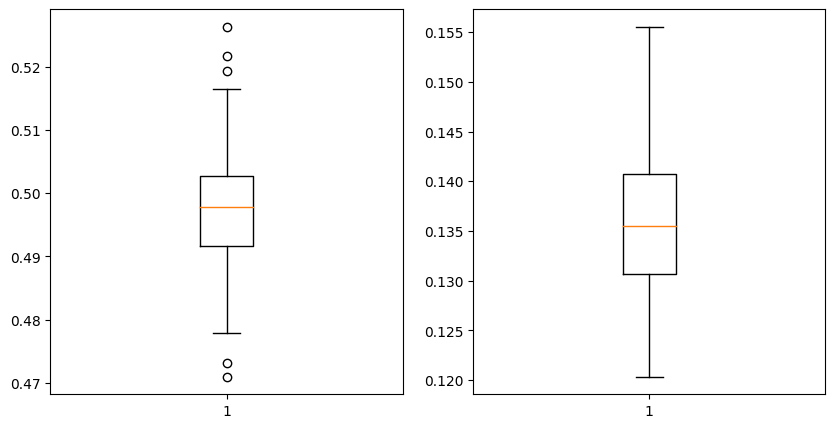

In [ ]:
# dla sigmy = 0.5
sigma = 0.5
results_pearson = []
results_mutual = []
for i in range(100):
  data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, sigma], [sigma, 1]]), n)
  X, Y = data_2d[:,0], data_2d[:,1]
  results_pearson.append(stats.pearsonr(X,Y)[0])
  num_bins = 10
  bin_X = np.linspace(X.min(), X.max(), num_bins + 1)
  bin_Y = np.linspace(Y.min(), Y.max(), num_bins + 1)
  discretized_X = np.digitize(X, bin_X)
  discretized_Y = np.digitize(Y, bin_Y)
  results_mutual.append(mutual_info_score(discretized_X, discretized_Y))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(results_pearson)
axs[1].boxplot(results_mutual)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

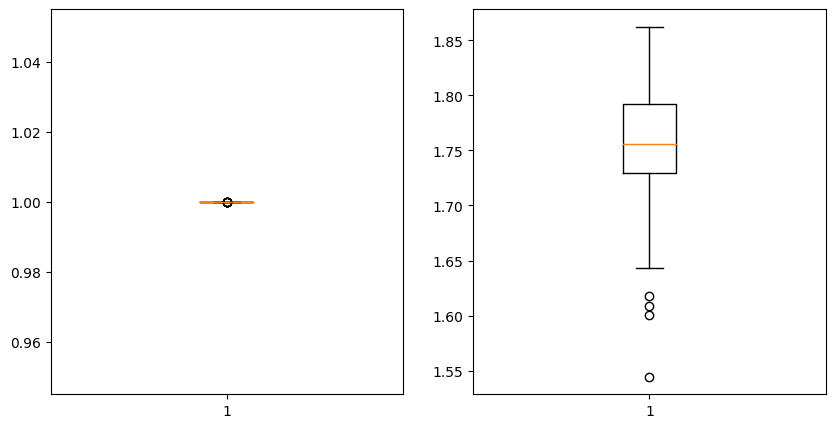

In [ ]:
# dla sigmy = 1
sigma = 1
results_pearson = []
results_mutual = []
for i in range(100):
  data_2d = np.random.multivariate_normal(np.zeros(2), np.array([[1, sigma], [sigma, 1]]), n)
  X, Y = data_2d[:,0], data_2d[:,1]
  results_pearson.append(stats.pearsonr(X,Y)[0])
  num_bins = 10
  bin_X = np.linspace(X.min(), X.max(), num_bins + 1)
  bin_Y = np.linspace(Y.min(), Y.max(), num_bins + 1)
  discretized_X = np.digitize(X, bin_X)
  discretized_Y = np.digitize(Y, bin_Y)
  results_mutual.append(mutual_info_score(discretized_X, discretized_Y))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(results_pearson)
axs[1].boxplot(results_mutual)
plt.show

In [ ]:
import math
sigma = [0,0.5,1]
-0.5 * math.log(1-0.25)

y = -0.5 * math.log(1-0.25)



0.14384103622589045

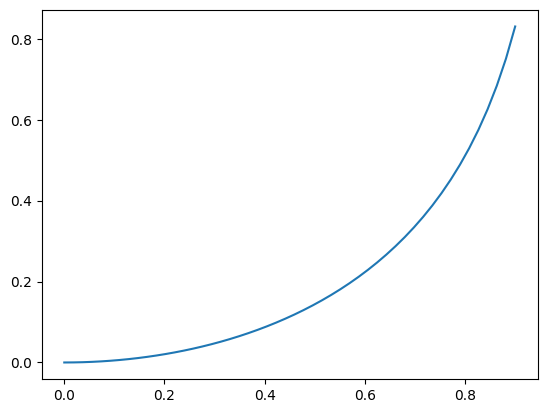

In [ ]:
# wykres
x = np.linspace(0, 0.9, 50)
y = np.zeros(50)
tmp = 1 - x**2
for i in range(50):
  if not tmp[i] > 0:
    y[i] = - 1
  else:
    y[i] = -0.5 * math.log(tmp[i])
plt.plot(x,y)

In [ ]:
# Mutual information
for i in range(3):
  num_bins = 10
  bin_X = np.linspace(X.min(), X.max(), num_bins + 1)
  bin_Y = np.linspace(Y.min(), Y.max(), num_bins + 1)
  discretized_X = np.digitize(X, bin_X)
  discretized_Y = np.digitize(Y, bin_Y)

In [ ]:
####################################
X_new = []
for i in range(1, num_bins + 1):
  X_new.append(sum(discretized_X == i))
X_new

[26, 132, 452, 979, 1292, 1189, 644, 223, 54, 8]

In [ ]:
mutual_info_score(discretized_X, discretized_Y)

1.8146835538318127

#### bp 3)

#### bp 4)

A hint: note that mutual information between two correlated normal distributions i.e. when $(X, Y)\sim \mathcal{N}((0,0)', \Sigma)$ and
$$\Sigma = \begin{pmatrix}
        \sigma_x^2 & \rho \\ \rho & \sigma_y^2
    \end{pmatrix}$$
equals
$$I(X,Y) = \frac{1}{2}\log \left(\frac{\sigma_x^2\sigma_y^2}{\sigma_x^2\sigma_y^2 - \rho^2}\right).$$

### b)

#### bp 1)

In [ ]:
# again: this is too time consuming so here is an answer

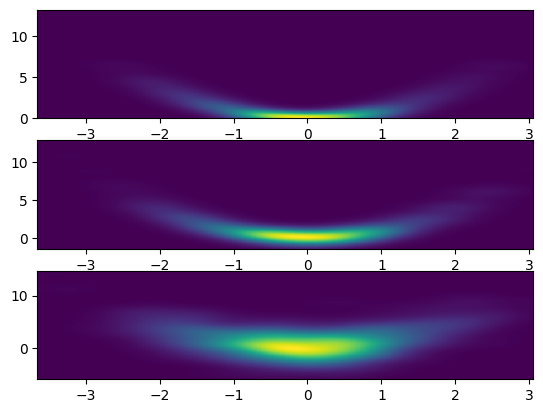

In [ ]:
fig, axs = plt.subplots(3)

n = 1000
x = np.random.normal(0, 1, n)

data_2d = np.array([x, x**2 + np.random.normal(0, 0, n)]).T
xi_0, yi_0, zi_0 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 0.5, n)]).T
xi_1, yi_1, zi_1 = plot_xyz(data_2d)
data_2d = np.array([x, x**2 + np.random.normal(0, 2, n)]).T
xi_2, yi_2, zi_2 = plot_xyz(data_2d)

# Make the plot
axs[0].pcolormesh(xi_0, yi_0, zi_0.reshape(xi_0.shape), shading='auto')
axs[1].pcolormesh(xi_1, yi_1, zi_1.reshape(xi_1.shape), shading='auto')
axs[2].pcolormesh(xi_2, yi_2, zi_2.reshape(xi_2.shape), shading='auto')
plt.show()

#### bp 2) and 3)

## Task 2

### a)

### b)

### c)

**Independent r.v.**

A hint: two discretized independent normal random variables (or any two independent discrete r.v.)

In [ ]:
# independent r.v. - we expect that our tests don't reject the null hypothesis

**Dependent r.v.**

A hint: two discretized dependent normal random variables (or two categorical wuch that we enforce $X=Y$ for a subset of observations)

In [ ]:
# independent r.v. - ideally we will reject the null hypothesis